In [1]:
# basics
import pandas as pd
import numpy as np
import time

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for simulations
from functools import partial
from multiprocessing import Pool
from functions import simulate_game, pick_random_dice, pick_frequent_dice, pick_random_score, pick_max_score

# to be removed?
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
simulate_game(1, pick_frequent_dice, pick_max_score)

[{'game': 1,
  'turn': 1,
  'pre_total_score': 0,
  'hand_1': array([6, 5, 4, 4, 4]),
  'dice_picks_1': [0, 0, 1, 1, 1],
  'hand_2': array([4, 4, 4, 3, 3]),
  'dice_picks_2': [1, 1, 1, 1, 1],
  'hand_3': array([4, 4, 4, 3, 3]),
  'chosen_score_type': 'full_house',
  'turn_score': 25,
  'post_total_score': 25,
  'chance_score': None,
  'ones_score': None,
  'twos_score': None,
  'threes_score': None,
  'fours_score': None,
  'fives_score': None,
  'sixes_score': None,
  'three_kind_score': None,
  'four_kind_score': None,
  'full_house_score': 25,
  'small_straight_score': None,
  'large_straight_score': None,
  'yahtzee_score': None,
  'chance_potential': 18,
  'ones_potential': 0,
  'twos_potential': 0,
  'threes_potential': 6,
  'fours_potential': 12,
  'fives_potential': 0,
  'sixes_potential': 0,
  'three_kind_potential': 18,
  'four_kind_potential': 0,
  'full_house_potential': 25,
  'small_straight_potential': 0,
  'large_straight_potential': 0,
  'yahtzee_potential': 0},
 {'game

In [3]:
simulate_game_random = partial(simulate_game, dice_decision_function = pick_random_dice, score_decision_function = pick_random_score)
simulate_game_frequent_max = partial(simulate_game, dice_decision_function = pick_frequent_dice, score_decision_function = pick_max_score)

## Test for optimal number of workers

,workers,time
0,2,1.339848
1,4,0.953635
2,6,0.838248
3,8,0.714233
4,10,0.749152
5,12,0.676845
6,14,0.762886
7,16,0.724704
8,18,0.764257
9,20,0.839696


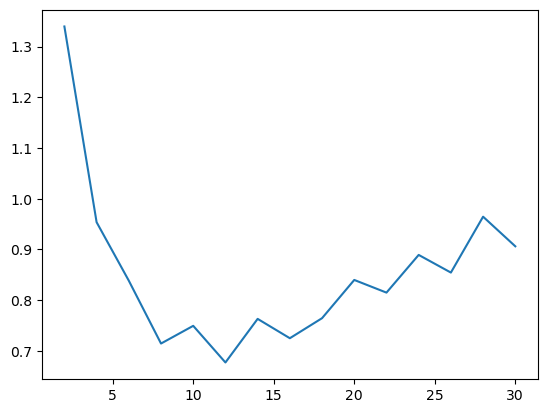

In [4]:
n_sims = 10**3

times = pd.DataFrame()

for workers in np.linspace(2, 30, 15):
    workers = int(workers)

    start = time.perf_counter()
    if __name__ == '__main__':
        with Pool(workers) as p:
            full_data = p.map(simulate_game_frequent_max, range(1, n_sims+1))
    end = time.perf_counter()

    result = pd.DataFrame({'workers': workers, 'time': end - start}, index=[0])
    times = pd.concat([times, result], ignore_index=True)

display(times)

plt.plot(times.workers, times.time)

In [5]:
workers = 12
n_sims = 10**5

if __name__ == '__main__':
    with Pool(workers) as p:
        full_data = p.map(simulate_game_frequent_max, range(1, n_sims+1))

full_data = [turn for game in full_data for turn in game]

TypeError: simulate_game() missing 2 required positional arguments: 'dice_decision_function' and 'score_decision_function'

In [ ]:
training_df = pd.DataFrame(full_data)

training_df

,game,turn,pre_total_score,hand_1,dice_picks_1,hand_2,dice_picks_2,hand_3,chosen_score_type,turn_score,...,threes_potential,fours_potential,fives_potential,sixes_potential,three_kind_potential,four_kind_potential,full_house_potential,small_straight_potential,large_straight_potential,yahtzee_potential
0,1,1,0,"[3, 5, 2, 2, 4]","[0, 0, 0, 0, 0]","[3, 3, 3, 5, 2]","[0, 0, 1, 0, 1]","[3, 2, 6, 5, 4]",yahtzee,0,...,3,4,5,6,0,0,0,30,40,0
1,1,2,0,"[1, 3, 3, 5, 1]","[0, 0, 0, 1, 1]","[5, 1, 5, 5, 2]","[1, 0, 1, 0, 1]","[5, 5, 2, 5, 5]",chance,22,...,0,0,20,0,22,22,0,0,0,-1
2,1,3,22,"[2, 6, 2, 2, 1]","[1, 0, 1, 1, 1]","[2, 2, 2, 1, 5]","[1, 0, 0, 0, 1]","[2, 5, 5, 1, 2]",four_kind,0,...,0,0,10,0,0,0,0,0,0,-1
3,1,4,22,"[6, 1, 1, 6, 6]","[1, 1, 1, 1, 1]","[6, 1, 1, 6, 6]","[1, 0, 1, 1, 0]","[6, 1, 6, 1, 1]",three_kind,15,...,0,0,0,12,15,-1,25,0,0,-1
4,1,5,37,"[5, 2, 4, 6, 2]","[0, 1, 1, 1, 0]","[2, 4, 6, 5, 6]","[0, 0, 0, 0, 0]","[1, 1, 5, 2, 5]",sixes,0,...,0,0,10,0,-1,-1,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299995,100000,9,12,"[5, 4, 3, 4, 2]","[1, 0, 1, 0, 0]","[5, 3, 4, 2, 4]","[0, 1, 0, 0, 1]","[3, 4, 5, 1, 5]",fours,4,...,-1,4,-1,-1,-1,-1,0,-1,-1,0
1299996,100000,10,16,"[2, 2, 4, 6, 6]","[0, 0, 0, 1, 1]","[6, 6, 2, 4, 5]","[0, 1, 1, 0, 0]","[6, 2, 1, 2, 3]",twos,4,...,-1,-1,-1,-1,-1,-1,0,-1,-1,0
1299997,100000,11,20,"[1, 3, 5, 2, 1]","[0, 0, 1, 1, 1]","[5, 2, 1, 5, 4]","[0, 1, 0, 1, 0]","[2, 5, 4, 3, 4]",yahtzee,0,...,-1,-1,-1,-1,-1,-1,0,-1,-1,0
1299998,100000,12,20,"[6, 5, 5, 4, 3]","[1, 0, 1, 1, 1]","[6, 5, 4, 3, 3]","[1, 1, 1, 1, 0]","[6, 5, 4, 3, 1]",chance,19,...,-1,-1,-1,-1,-1,-1,0,-1,-1,-1


In [ ]:
training_df.dtypes

game                          int64
turn                          int64
pre_total_score               int64
hand_1                       object
dice_picks_1                 object
hand_2                       object
dice_picks_2                 object
hand_3                       object
chosen_score_type            object
turn_score                    int64
post_total_score              int64
chance_score                float64
ones_score                  float64
twos_score                  float64
threes_score                float64
fours_score                 float64
fives_score                 float64
sixes_score                 float64
three_kind_score            float64
four_kind_score             float64
full_house_score            float64
small_straight_score        float64
large_straight_score        float64
yahtzee_score               float64
chance_potential              int64
ones_potential                int64
twos_potential                int64
threes_potential            

In [ ]:
training_df.iloc[4,:]

game                                      1
turn                                      5
pre_total_score                          37
hand_1                      [5, 2, 4, 6, 2]
dice_picks_1                [0, 1, 1, 1, 0]
hand_2                      [2, 4, 6, 5, 6]
dice_picks_2                [0, 0, 0, 0, 0]
hand_3                      [1, 1, 5, 2, 5]
chosen_score_type                     sixes
turn_score                                0
post_total_score                         37
chance_score                           22.0
ones_score                              NaN
twos_score                              NaN
threes_score                            NaN
fours_score                             NaN
fives_score                             NaN
sixes_score                             0.0
three_kind_score                       15.0
four_kind_score                         0.0
full_house_score                        NaN
small_straight_score                    NaN
large_straight_score            

In [ ]:
training_df[training_df.turn == 13].head()

,game,turn,pre_total_score,hand_1,dice_picks_1,hand_2,dice_picks_2,hand_3,chosen_score_type,turn_score,...,threes_potential,fours_potential,fives_potential,sixes_potential,three_kind_potential,four_kind_potential,full_house_potential,small_straight_potential,large_straight_potential,yahtzee_potential
12,1,13,46,"[3, 2, 2, 4, 5]","[0, 0, 0, 0, 1]","[5, 6, 5, 2, 5]","[1, 0, 1, 0, 0]","[5, 5, 6, 3, 6]",fives,10,...,-1,-1,10,-1,-1,-1,-1,-1,-1,-1
25,2,13,37,"[4, 3, 1, 2, 5]","[0, 1, 1, 1, 0]","[3, 1, 2, 3, 2]","[0, 1, 0, 1, 1]","[1, 3, 2, 1, 1]",large_straight,0,...,-1,-1,-1,-1,-1,-1,-1,-1,0,-1
38,3,13,38,"[2, 4, 6, 2, 2]","[1, 1, 0, 0, 1]","[2, 4, 2, 6, 6]","[0, 1, 1, 1, 0]","[4, 2, 6, 5, 5]",twos,2,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
51,4,13,55,"[3, 6, 1, 5, 3]","[0, 0, 1, 1, 1]","[1, 5, 3, 1, 5]","[1, 1, 0, 0, 1]","[1, 5, 5, 1, 2]",yahtzee,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
64,5,13,65,"[3, 6, 1, 1, 4]","[1, 1, 0, 0, 1]","[3, 6, 4, 6, 5]","[0, 0, 1, 1, 0]","[4, 6, 3, 4, 5]",large_straight,0,...,-1,-1,-1,-1,-1,-1,-1,-1,0,-1


C:\Users\Keith\AppData\Local\Temp\ipykernel_22216\2760875263.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(training_df[training_df.turn == 13].post_total_score, ax = ax)


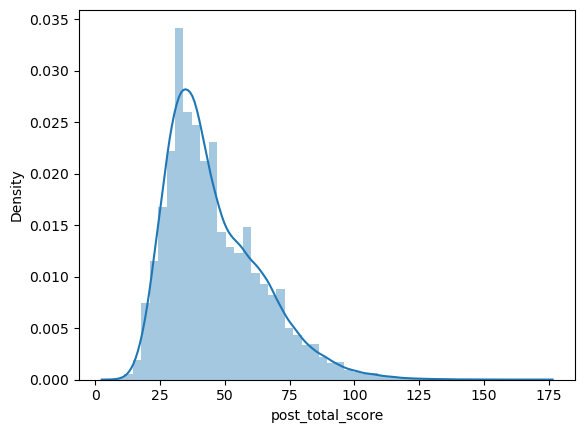

In [ ]:
fig, ax = plt.subplots()

sns.distplot(training_df[training_df.turn == 13].post_total_score, ax = ax)

plt.show()

In [ ]:
training_df[[f'hand_1_dice_{x}' for x in range(1,6)]] = pd.DataFrame(training_df.hand_1.to_list(), index= training_df.index)
training_df[[f'hand_2_dice_{x}' for x in range(1,6)]] = pd.DataFrame(training_df.hand_2.to_list(), index= training_df.index)
training_df[[f'hand_3_dice_{x}' for x in range(1,6)]] = pd.DataFrame(training_df.hand_3.to_list(), index= training_df.index)
training_df[[f'picks_1_dice_{x}' for x in range(1,6)]] = pd.DataFrame(training_df.dice_picks_1.to_list(), index= training_df.index)
training_df[[f'picks_2_dice_{x}' for x in range(1,6)]] = pd.DataFrame(training_df.dice_picks_2.to_list(), index= training_df.index)
training_df = training_df.drop(['hand_1', 'hand_2', 'hand_3', 'dice_picks_1', 'dice_picks_2'], axis = 1)
training_df

,game,turn,pre_total_score,chosen_score_type,turn_score,post_total_score,chance_score,ones_score,twos_score,threes_score,...,picks_1_dice_1,picks_1_dice_2,picks_1_dice_3,picks_1_dice_4,picks_1_dice_5,picks_2_dice_1,picks_2_dice_2,picks_2_dice_3,picks_2_dice_4,picks_2_dice_5
0,1,1,0,yahtzee,0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,1
1,1,2,0,chance,22,22,22.0,NaN,NaN,NaN,...,0,0,0,1,1,1,0,1,0,1
2,1,3,22,four_kind,0,22,22.0,NaN,NaN,NaN,...,1,0,1,1,1,1,0,0,0,1
3,1,4,22,three_kind,15,37,22.0,NaN,NaN,NaN,...,1,1,1,1,1,1,0,1,1,0
4,1,5,37,sixes,0,37,22.0,NaN,NaN,NaN,...,0,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299995,100000,9,12,fours,4,16,NaN,3.0,NaN,3.0,...,1,0,1,0,0,0,1,0,0,1
1299996,100000,10,16,twos,4,20,NaN,3.0,4.0,3.0,...,0,0,0,1,1,0,1,1,0,0
1299997,100000,11,20,yahtzee,0,20,NaN,3.0,4.0,3.0,...,0,0,1,1,1,0,1,0,1,0
1299998,100000,12,20,chance,19,39,19.0,3.0,4.0,3.0,...,1,0,1,1,1,1,1,1,1,0


In [ ]:
training_df.columns

Index(['game', 'turn', 'pre_total_score', 'chosen_score_type', 'turn_score',
       'post_total_score', 'chance_score', 'ones_score', 'twos_score',
       'threes_score', 'fours_score', 'fives_score', 'sixes_score',
       'three_kind_score', 'four_kind_score', 'full_house_score',
       'small_straight_score', 'large_straight_score', 'yahtzee_score',
       'chance_potential', 'ones_potential', 'twos_potential',
       'threes_potential', 'fours_potential', 'fives_potential',
       'sixes_potential', 'three_kind_potential', 'four_kind_potential',
       'full_house_potential', 'small_straight_potential',
       'large_straight_potential', 'yahtzee_potential', 'hand_1_dice_1',
       'hand_1_dice_2', 'hand_1_dice_3', 'hand_1_dice_4', 'hand_1_dice_5',
       'hand_2_dice_1', 'hand_2_dice_2', 'hand_2_dice_3', 'hand_2_dice_4',
       'hand_2_dice_5', 'hand_3_dice_1', 'hand_3_dice_2', 'hand_3_dice_3',
       'hand_3_dice_4', 'hand_3_dice_5', 'picks_1_dice_1', 'picks_1_dice_2',
       'pic

In [ ]:
training_df.shape

(1300000, 57)

In [ ]:
training_df.iloc[12,:]

game                                      1
turn                                     13
pre_total_score                          46
hand_1                      [3, 2, 2, 4, 5]
dice_picks_1                [0, 0, 0, 0, 1]
hand_2                      [5, 6, 5, 2, 5]
dice_picks_2                [1, 0, 1, 0, 0]
hand_3                      [5, 5, 6, 3, 6]
chosen_score_type                     fives
turn_score                               10
post_total_score                         56
chance_score                           22.0
ones_score                              2.0
twos_score                              0.0
threes_score                            3.0
fours_score                             4.0
fives_score                            10.0
sixes_score                             0.0
three_kind_score                       15.0
four_kind_score                         0.0
full_house_score                        0.0
small_straight_score                    0.0
large_straight_score            